# CHAPTER 01 : INTRODUCTION

### Finding Key Connectors

In [3]:
users = [
 { "id": 0, "name": "Hero" },
 { "id": 1, "name": "Dunn" },
 { "id": 2, "name": "Sue" },
 { "id": 3, "name": "Chi" },
 { "id": 4, "name": "Thor" },
 { "id": 5, "name": "Clive" },
 { "id": 6, "name": "Hicks" },
 { "id": 7, "name": "Devin" },
 { "id": 8, "name": "Kate" },
 { "id": 9, "name": "Klein" }
]

In [4]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [5]:
# Initialize the dict with an empty list for each user id:

friendships = {user["id"]: [] for user in users}

In [6]:
friendships

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [7]:
# And loop over the friendship pairs to populate it:

for i, j in friendship_pairs:
    friendships[i].append(j) # Add j as a friend of user i
    friendships[j].append(i) # Add i as a friend of user j

In [8]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

Ask questions, like “what’s the average number of connections?”


First we find the total number of connections, by summing up the lengths of all the
friends lists:

In [9]:
def number_of_friends(user):
    '''How many friends dose_user_have'''
    
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

In [10]:
total_connections = sum(number_of_friends(user) for user in users)
total_connections

24

And then we just divide by the number of users:

In [11]:
num_users = len(users)
avg_connections = total_connections / num_users

avg_connections

2.4

we can sort them from “most friends” to “least friends”:

In [12]:
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]


In [13]:
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [14]:
num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse = True)

In [15]:
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

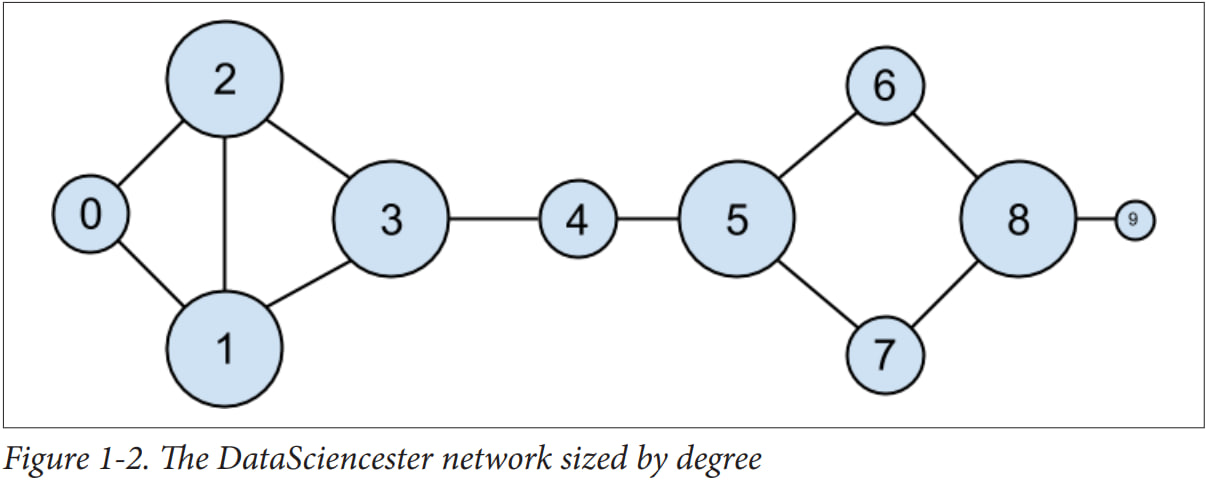

Here, 

```python
        sorted(num_friends_by_id, key=lambda item: item[1], reverse=True)
```


In Python, the `key` parameter in functions like `sorted()`, `min()`, and `max()` is used to specify a function that calculates a value, known as a "key," for each item in the iterable. The purpose of the `key` function is to determine the basis for sorting, filtering, or comparing items in the iterable.

When you use `key` with a lambda function, as in `key=lambda item: ...`, it means that you're defining a custom function on the fly using a lambda expression. The lambda function takes an item from the iterable, processes it, and returns a value that will be used for sorting or comparison.

For example, in the context of the `sorted()` function, when you provide a `key` function like `key=lambda item: item[1]`, it means that you want to sort the iterable based on the values returned by this lambda function. The lambda function `item[1]` extracts the second element of each item in the iterable, and this value is used as the basis for sorting the items.

Here's a breakdown of how it works:

- The `sorted()` function iterates through the items in the iterable (e.g., a list of tuples).
- For each item, it calls the provided `key` function (in this case, the lambda function), passing the item as an argument.
- The lambda function processes the item and returns a value that will be used for comparison.
- The `sorted()` function then performs the sorting based on these computed values and the specified sorting order (ascending or descending).

This allows you to sort or manipulate items in the iterable based on specific criteria without altering the original data.

### Data Scientists You May Know

To make a "People you may know" suggester we need to find the connection between users. Like a user might know the firends of
friends. Such calculations can be made easily by following,

In [16]:
def foaf_ids_bad(user):
    return [foaf_id
           for friend_id in friendships[user["id"]]
           for foaf_id in friendships[friend_id]]

In [17]:
users[0]

{'id': 0, 'name': 'Hero'}

In [18]:
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

It includes user 0 twice, since Hero is indeed friends with both of his
friends. It includes users 1 and 2, although they are both friends with Hero
already. And it includes user 3 twice, as Chi is reachable through two
different friends:

In [19]:
print(friendships[0])
print(friendships[1])
print(friendships[2]) 

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [20]:
from collections import Counter 

In [21]:
def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
    foaf_id
    for friend_id in friendships[user_id] # For each of my friends
    for foaf_id in friendships[friend_id] # find their friends 
    if foaf_id != user_id # who aren't me
    and foaf_id not in friendships[user_id]) # and aren't my friends

print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


This correctly tells Chi (id 3) that she has two mutual friends with Hero (id
0) but only one mutual friend with Clive (id 5).


### “substantive expertise”

In [22]:
interests = [
        (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
        (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),(1, "Postgres"),
        (2, "Python"), (2, "scikit-learn"), (2, "scipy"),(2, "numpy"), (2, "statsmodels"), (2, "pandas"),
        (3, "R"), (3, "Python"),(3, "statistics"), (3, "regression"), (3, "probability"),    
        (4, "machine learning"), (4, "regression"), (4, "decision trees"),(4, "libsvm"),
        (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),(5, "Haskell"), (5, "programming languages"),
        (6, "statistics"),(6, "probability"), (6, "mathematics"), (6, "theory"),
        (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),(7, "neural networks"),
        (8, "neural networks"), (8, "deep learning"),(8, "Big Data"), (8, "artificial intelligence"),
        (9, "Hadoop"),(9, "Java"), (9, "MapReduce"), (9, "Big Data")
        ]


function that finds users with a certain interest:


In [23]:
def data_scientists_who_like(target_interest):
    """Find the ids of all users who like the target interest"""
    return [user_id
           for user_id, user_interest in interests
           if user_interest == targeet_interest]

This works, but it has to examine the whole list of interests for every
search. If we have a lot of users and interests (or if we just want to do a lot
of searches), we’re probably better off building an index from interests to
users:

In [24]:
from collections import defaultdict

In [26]:
# Keys are interests, values are lists of users_ids with that interest

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

And another from users to interests:


In [27]:
# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)# 

Now it’s easy to find who has the most interests in common with a given
user:
- Iterate over the user’s interests.
- For each interest, iterate over the other users with that interest.
- Keep count of how many times we see each other user.

In [28]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )


### Salaries and Experience

In [29]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]


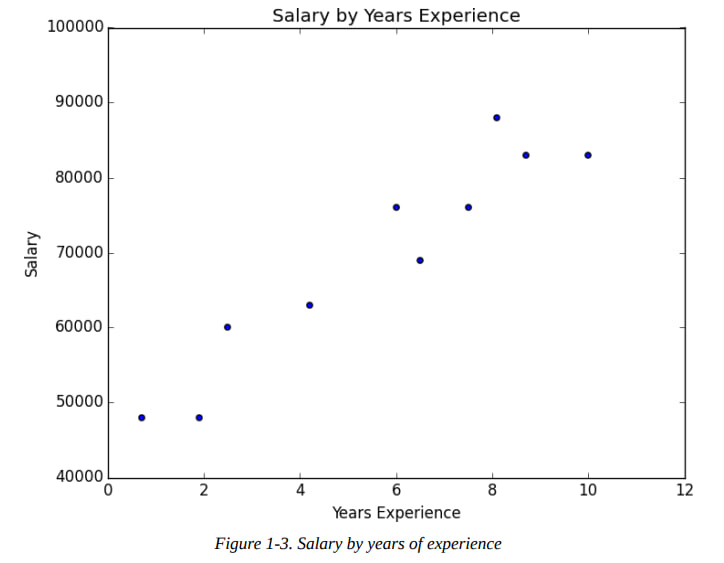

It seems clear that people with more experience tend to earn more. Our first idea is to look at the average salary for each tenure.

In [30]:
# Keys are years, values are lists of the salaries of each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
# Keys are years, each value is average salary for that tenure.
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [31]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

It might be more helpful to bucket the tenures:


In [34]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"


Then we can group together the salaries corresponding to each bucket:


In [35]:
# Keys are tenure buckets, values are lists of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

And finally compute the average salary for each group:

In [36]:
# Keys are tenure buckets, values are average salary for that bucket.
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}


In [37]:
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

### Paid Accounts

In [38]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"